# 1. 데이터 로드 및 기본 탐색

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.Class.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

# 2. 샘플링

In [7]:
# 라벨에 따라 fraud, normal 구분
df_fraud = df[df.Class == 1]
df_normal = df[df.Class == 0]

# 정상 10000개 샘플링
df_normal_sample = df_normal.sample(n=10000, random_state=42)

# concat
df_ = pd.concat([df_fraud, df_normal_sample], axis=0)

In [8]:
df_.Class.value_counts(normalize=True)

Class
0    0.953107
1    0.046893
Name: proportion, dtype: float64

# 3. 데이터 전처리

In [9]:
# Amount 변수 표준화 (StandardScaler)
scaler = StandardScaler()
df_['Amount_Scaled'] = scaler.fit_transform(df_[['Amount']])

# 원본 Amount 변수 제거
df_ = df_.drop(['Amount'], axis=1)

# X, y 데이터프레임 분리 [cite: 11]
X = df_.drop('Class', axis=1)
y = df_['Class']

# 4. 학습 데이터와 테스트 데이터 분할

In [10]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Split Data Class Ratio (Train):")
print(y_train.value_counts(normalize=True))
print("\nSplit Data Class Ratio (Test):")
print(y_test.value_counts(normalize=True))

Split Data Class Ratio (Train):
Class
0    0.953056
1    0.046944
Name: proportion, dtype: float64

Split Data Class Ratio (Test):
Class
0    0.953311
1    0.046689
Name: proportion, dtype: float64


# 5. SMOTE 적용

## SMOTE 적용 이유
* 신용카드 사기 거래 데이터는 정상 거래에 비해 양이 매우 적습니다. 이 상태로 학습하면 모델이 다수 클래스(정상)에 편향되어 사기 거래를 제대로 찾아내지 못하게 됩니다. SMOTE는 소수 클래스의 데이터를 합성하여 데이터 균형을 맞춤으로써 사기 탐지 성능을 높여줍니다.

In [11]:
# SMOTE 적용 전 사기 거래 건수
print(f"Before SMOTE - Fraud Count: {sum(y_train == 1)}")

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# SMOTE 적용 후 사기 거래 건수
print(f"After SMOTE - Fraud Count: {sum(y_train_over == 1)}")

Before SMOTE - Fraud Count: 394
After SMOTE - Fraud Count: 7999


# 6. 모델 학습

In [12]:
# 모델 선정 및 학습 (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_over, y_train_over)

# 예측값 및 예측 확률 출력
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 성능 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))

# PR-AUC 계산 및 출력 [cite: 17]
pr_auc = average_precision_score(y_test, y_prob)
print(f"PR-AUC score: {pr_auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.95      0.89      0.92        98

    accuracy                           0.99      2099
   macro avg       0.97      0.94      0.96      2099
weighted avg       0.99      0.99      0.99      2099

PR-AUC score: 0.9538


# 7. 최종 성능 평가

| Metric (Class 0) | Target | Result (Baseline RF) | Status |
| --- | --- | --- | --- |
| Recall | $\ge 0.80$ | 1.00 | Pass| 
| F1-score | $\ge 0.88$ | 1.00 | Pass | 
| PR-AUC | $\ge 0.90$ | 0.95 | Pass | 

| Metric (Class 1) | Target | Result (Baseline RF) | Status |
| --- | --- | --- | --- |
| Recall | $\ge 0.80$ | 0.89 | Pass| 
| F1-score | $\ge 0.88$ | 0.92 | Pass | 
| PR-AUC | $\ge 0.90$ | 0.95 | Pass | 

* Random Forest 모델을 기본 하이퍼파라미터로 학습시킨 결과, 별도의 복잡한 튜닝 없이도 과제에서 제시한 모든 목표 지표(Recall 0.80, F1 0.88, PR-AUC 0.90)를 상회하는 성능을 보였습니다.

* 특히 사기 거래(Class 1) 탐지 성능의 핵심인 Recall이 0.89로 나타나, 실제 사기 사례를 놓치지 않고 높은 확률로 잡아내고 있음을 확인했습니다.

* PR-AUC 점수가 0.95로 매우 높게 나타난 것은 모델이 임계값(Threshold) 변화에 관계없이 정밀도와 재현율 사이에서 안정적인 성능을 유지하고 있음을 뜻합니다. 이는 데이터의 불균형이 심함에도 불구하고 SMOTE를 통한 오버샘플링이 효과적으로 작용했음을 시사합니다.

# 8. 기타 작업

## Precision - Recall Curve

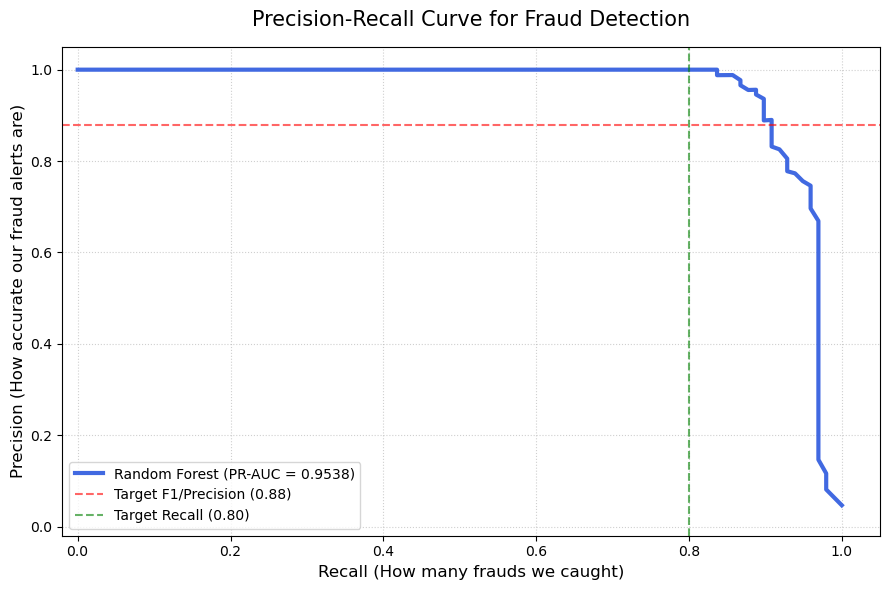

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Precision-Recall Curve 데이터 계산
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# 2. 시각화
plt.figure(figsize=(9, 6))

# PR 곡선 그리기
plt.plot(recalls, precisions, label=f'Random Forest (PR-AUC = {pr_auc:.4f})', color='royalblue', lw=3)

# 과제 목표치 가이드라인 추가
plt.axhline(y=0.88, color='red', linestyle='--', alpha=0.6, label='Target F1/Precision (0.88)')
plt.axvline(x=0.80, color='green', linestyle='--', alpha=0.6, label='Target Recall (0.80)')

# 그래프 꾸미기
plt.title('Precision-Recall Curve for Fraud Detection', fontsize=15, pad=15)
plt.xlabel('Recall (How many frauds we caught)', fontsize=12)
plt.ylabel('Precision (How accurate our fraud alerts are)', fontsize=12)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)

# 한계선 설정 (가독성 향상)
plt.xlim([-0.02, 1.05])
plt.ylim([-0.02, 1.05])

plt.tight_layout()
plt.show()

## Threshold에 따른 precision, recall, f1-score 값 변화 및 최적의 threshold 선정

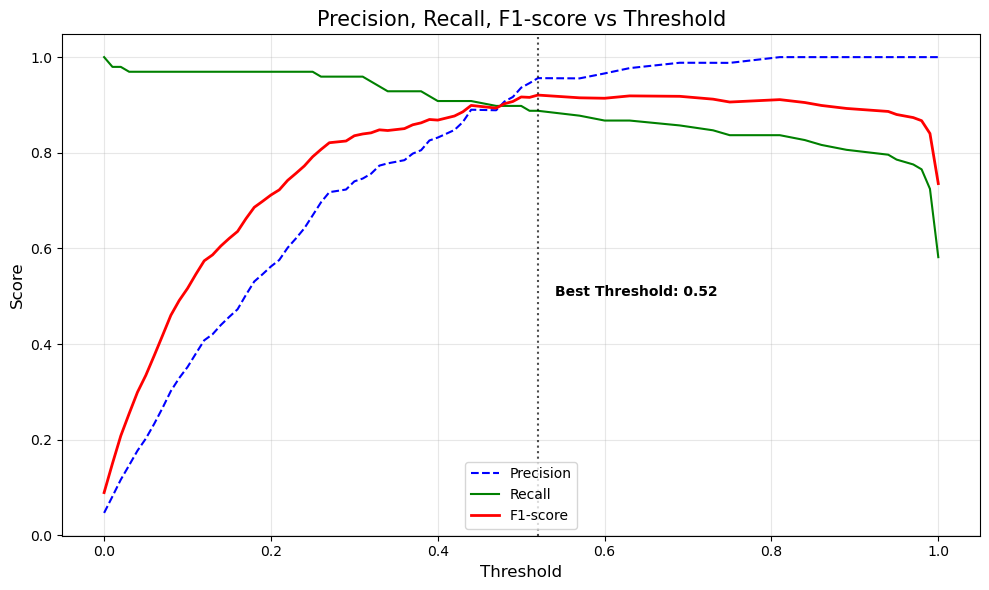

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 1. Threshold 변화에 따른 precision, recall 계산
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# 2. F1-score 계산
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

# 3. 시각화
plt.figure(figsize=(10, 6))

# 각 지표 플로팅
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue', linestyle='--')
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores, label='F1-score', color='red', lw=2)

# F1-score가 최대인 지점 찾기
max_f1_idx = np.argmax(f1_scores)
best_threshold = thresholds[max_f1_idx]
plt.axvline(x=best_threshold, color='black', linestyle=':', alpha=0.7)
plt.text(best_threshold+0.02, 0.5, f'Best Threshold: {best_threshold:.2f}', fontsize=10, fontweight='bold')

# 그래프 설정
plt.title('Precision, Recall, F1-score vs Threshold', fontsize=15)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(loc='lower center', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()